In [ ]:
# Stationarity Time Series Tests - Monthly UBS Stocks data


# Stationary series -  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time.
# Examples of stationary series are: stock prices, coin flips, white noise, ...
# Weak stationarity only requires the shift-invariance (in time) of the first moment and the cross moment (the auto-covariance).
# Strong stationarity requires the shift-invariance (in time) of the finite-dimensional distributions of a stochastic process.
# Perform the test and decide if the provided UBS time series is stationary or not. 


# Unit root - feature of some stochastic processes (such as random walks) that can cause problems in statistical inference involving time series models. In a simple term, the unit root is non-stationary but does not always have a trend component.
# Test - this is the result of test. We compare it to critical values.  
# In the case series is not stationary, we must detrend it.
# p-value - The p-value reported by the test is the probability score based on which you can decide whether to reject the null hypothesis or not. If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.
# Lags used - a number of lags included, where n is the length of the series.
# Number of observations used - number of rows.
# Critical value 1% - alpha = 0.01 implies that the null hypothesis is rejected 1 % of the time when it is in fact true.
# Critical value 5% - alpha = 0.05 implies that the null hypothesis is rejected 5 % of the time when it is in fact true.
# Critical value 10% - alpha = 0.1 implies that the null hypothesis is rejected 10 % of the time when it is in fact true.


In [50]:
# Install and import the needed libraries

In [51]:
pip install pandas-datareader

In [52]:
import pandas_datareader.data as web
import datetime

In [53]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
pip install seaborn

In [55]:
import seaborn as sns

In [56]:
sns.set()

In [57]:
pip install statsmodels

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# re is the library to remove and replace the not needed characters 

In [12]:
import re

In [13]:
chars_to_remove = [',']

In [14]:
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'

In [98]:
# upload the monthly data in csv format to data frame
# https://www.kaggle.com/datasets/spribylova/monthly-ubs-stocks

In [59]:
UBS_volume_m = pd.read_csv("UBS_volume_m.csv", index_col=0, parse_dates=True)
UBS_volume_m.head()

# Open high low (OHL) strategy refers to an intraday trading strategy.
# This serves as an indication a trader must buy a stock.
# Most Active (Volume) helps you identify the stocks with highest trading volume during the day. 
# Most active stocks offers high liquidity and lower bid-ask.
# Volume -  The current month's trading volume.
# Low - The current month's low price.
# High - The current month's low price.
# Open - The opening price for the specified month.

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-01,12.22,13.54,12.04,12.85,"288,360,058"
2020-01-01,12.27,12.88,11.93,12.00,"407,893,788"
2021-01-01,12.63,13.81,12.52,12.88,"281,886,722"
2022-01-01,16.43,18.00,16.38,17.10,"190,959,295"
2018-02-01,19.05,19.20,17.09,18.07,"212,872,180"


In [60]:
UBS_volume_m=UBS_volume_m.groupby(['Date'])['Volume'].sum().reset_index() 

In [61]:
UBS_volume_m

,Date,Volume
0,2018-02-01,"212,872,180"
1,2018-03-01,"273,193,341"
2,2018-04-01,"273,653,003"
3,2018-05-01,"305,739,793"
4,2018-06-01,"324,318,650"
5,2018-07-01,"258,869,502"
6,2018-08-01,"178,265,280"
7,2018-09-01,"241,667,332"
8,2018-10-01,"347,222,876"
9,2018-11-01,"316,159,262"


In [62]:
UBS_volume_m.dtypes

Date      datetime64[ns]
Volume            object
dtype: object

In [63]:
#  Convert object type to integer and remove comma regular expressions 

In [67]:
UBS_volume_m['Volume_int'] = UBS_volume_m['Volume'].str.replace(regular_expression, '', regex=True)

In [68]:
UBS_volume_m['Volume_int2'] = UBS_volume_m['Volume_int'].astype(int)

In [69]:
# Convert Date in nanoseconds to simple 7 values string

In [73]:
UBS_volume_m['Date_str'] = UBS_volume_m['Date'].astype(str)

In [72]:
UBS_volume_m['Date_str7'] = UBS_volume_m['Date_str'].str[:7]

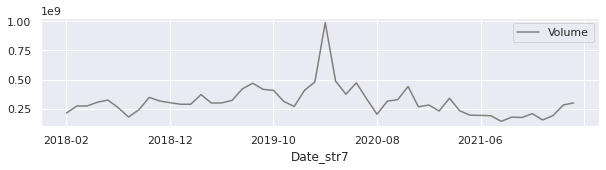

In [74]:
UBS_volume_m.plot(figsize=(10,2),x='Date_str7', y='Volume_int2',color="tab:grey", label='Volume') 

In [96]:
UBS_volume_m

,Date,Volume,Volume_int,Volume_int2,Date_str,Date_str7
0,2018-02-01,"212,872,180",212872180,212872180,2018-02-01,2018-02
1,2018-03-01,"273,193,341",273193341,273193341,2018-03-01,2018-03
2,2018-04-01,"273,653,003",273653003,273653003,2018-04-01,2018-04
3,2018-05-01,"305,739,793",305739793,305739793,2018-05-01,2018-05
4,2018-06-01,"324,318,650",324318650,324318650,2018-06-01,2018-06
5,2018-07-01,"258,869,502",258869502,258869502,2018-07-01,2018-07
6,2018-08-01,"178,265,280",178265280,178265280,2018-08-01,2018-08
7,2018-09-01,"241,667,332",241667332,241667332,2018-09-01,2018-09
8,2018-10-01,"347,222,876",347222876,347222876,2018-10-01,2018-10
9,2018-11-01,"316,159,262",316159262,316159262,2018-11-01,2018-11


In [97]:
UBS_volume_m.dtypes

Date           datetime64[ns]
Volume                 object
Volume_int             object
Volume_int2             int64
Date_str               object
Date_str7              object
dtype: object

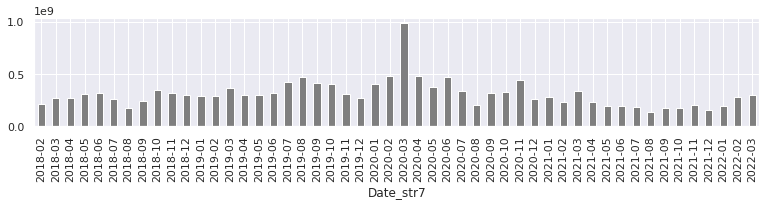

In [77]:
UBS_volume_m.plot(figsize=(13,2),x='Date_str7',y='Volume_int2', kind="bar", color="tab:grey", legend=False);

In [78]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [80]:
UBS_volume_m_2 = UBS_volume_m[['Date','Volume_int2']]

In [81]:
# Rolling function will provide trend over given number of bins

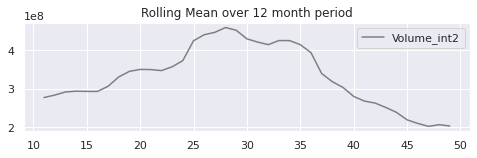

In [82]:
UBS_volume_m_2.rolling(window = 12).mean().plot(y='Volume_int2',figsize=(8,2), color="tab:grey", title="Rolling Mean over 12 month period");

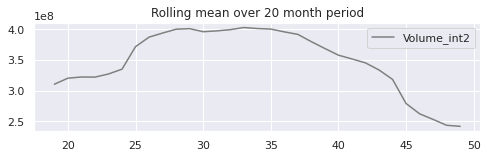

In [83]:
UBS_volume_m_2.rolling(window = 20).mean().plot(figsize=(8,2), color="tab:grey", title="Rolling mean over 20 month period");

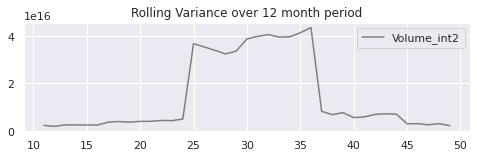

In [84]:
UBS_volume_m_2.rolling(window = 12).var().plot(figsize=(8,2), color="tab:grey", title="Rolling Variance over 12 month period");

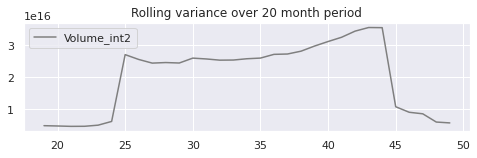

In [85]:
UBS_volume_m_2.rolling(window = 20).var().plot(figsize=(8,2), color="tab:grey", title="Rolling variance over 20 month period");

In [86]:
import statsmodels.api as sm

In [87]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
# https://www.marketwatch.com/investing/stock/ubsg/download-data?startDate=3/1/2017&endDate=3/23/2022&countryCode=ch 
# https://www.econstor.eu/bitstream/10419/67744/1/616664753.pdf
# https://support.google.com/docs/answer/3093281?hl=en#
# https://www.nasdaq.com/market-activity/stocks/ubs/historical
# https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322
# https://www.bauer.uh.edu/rsusmel/phd/ec2-5.pdf
# https://www.statsmodels.org/devel/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [88]:
# Augmented Dickey Fuller Test 

# Null Hypothesis: The series has a unit root (series is not stationary.
# Alternate Hypothesis: The series has no unit root, the trend is stationary.
# If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.

In [89]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [90]:
# The p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. 
# The series is stationary.
# The result of Test Statistic is lower than any Critical value

In [91]:
adf_test(UBS_volume_m_2["Volume_int2"])

Results of Dickey-Fuller Test:
Test Statistic                 -3.719042
p-value                         0.003853
#Lags Used                      0.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [92]:
# KPSS Test 

# Null Hypothesis: The process is trend stationary.
# Alternate Hypothesis: The series has a unit root (series is not stationary).
# A function is created to carry out the KPSS test on a time series.

In [93]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [94]:
kpss_test(UBS_volume_m_2['Volume_int2'])

Results of KPSS Test:
Test Statistic            0.164824
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [95]:
# The p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. 
# The series is stationary, we cannot reject te null hypothesis.
# The result of Test Statistic is lower than any Critical value